# 6. Object detection

### 6.2. Using Auto-Keras’ pre-trained models for object detection

Finished loading model!
[{'left': 20, 'top': 300, 'width': 159, 'height': 208, 'category': 'cat', 'confidence': 0.982774019241333}, {'left': 602, 'top': 276, 'width': 100, 'height': 219, 'category': 'cat', 'confidence': 0.6056681275367737}, {'left': 293, 'top': 361, 'width': 148, 'height': 141, 'category': 'dog', 'confidence': 0.9741163849830627}]


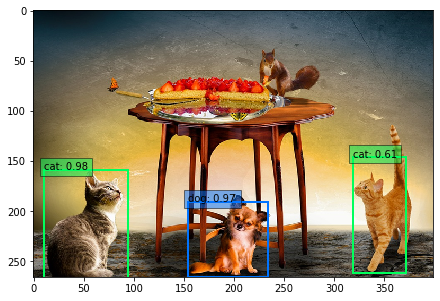

In [39]:
# Single Short Multibox Detector
# pre-trained on the VOC data set: http://host.robots.ox.ac.uk/pascal/VOC/

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from autokeras_pretrained.object_detector import ObjectDetector
detector = ObjectDetector()

img_name = 'catdogsquirrel'
img_ext = '.png'
results = detector.predict(img_name + img_ext)
print(results)

results_folder = 'results/'
results = detector.predict(img_name + img_ext, 
                           output_file_path=results_folder)
img = mpimg.imread(results_folder + img_name + '_prediction' + img_ext)
plot = plt.imshow(img)

### 6.3. Building our own data set for use with the pre-trained model

In [40]:
# based on https://dev.to/petercour/image-scraping-with-python-330a

import re
import requests

def download_baidu(keyword, max_results=20): 
    url = 'https://image.baidu.com/search/flip?tn=baiduimage&ie=utf-8&word='+keyword+'&ct=201326592&v=flip'
    result = requests.get(url)
    html = result.text
    pic_url = re.findall('"objURL":"(.*?)",',html,re.S)

    for i, each in enumerate(pic_url):
        if i >= max_results:
            break
        print(i, '/', len(pic_url))
        try:
            pic = requests.get(each, timeout=10)
        except Exception:
            print('exception')
            continue

        string = 'scraped/pictures_'+keyword+'_'+str(i) + '.jpg'
        fp = open(string,'wb')
        fp.write(pic.content)
        fp.close()


download_baidu('cars+people')

0 / 60
1 / 60
2 / 60
3 / 60
4 / 60
5 / 60
6 / 60
7 / 60
8 / 60
9 / 60
10 / 60
11 / 60
12 / 60
13 / 60
14 / 60
15 / 60
16 / 60
17 / 60
18 / 60
19 / 60


Finished loading model!
pictures_cars+people_5.jpg


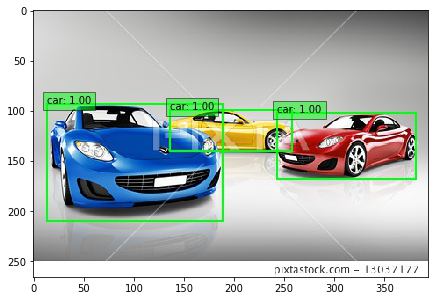

pictures_cars+people_3.jpg


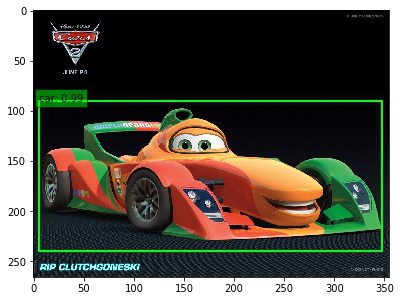

pictures_cars+people_11.jpg


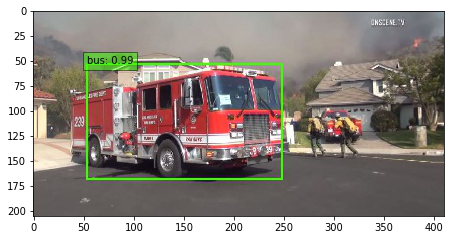

pictures_cars+people_13.jpg


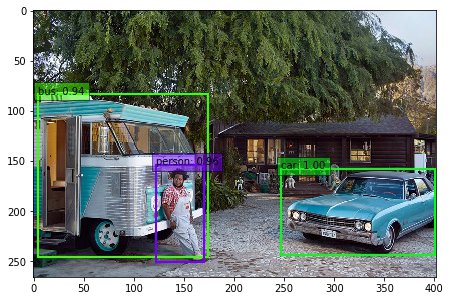

pictures_cars+people_1.jpg


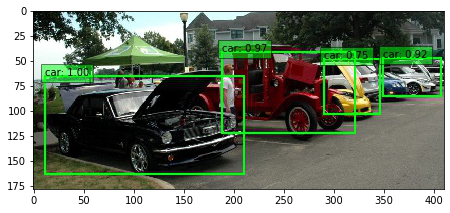

pictures_cars+people_16.jpg


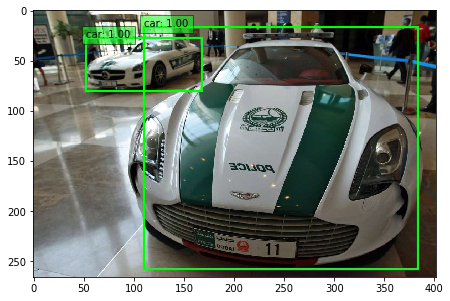

pictures_cars+people_0.jpg
skipping pictures_cars+people_0.jpg
pictures_cars+people_9.jpg
skipping pictures_cars+people_9.jpg
pictures_cars+people_8.jpg


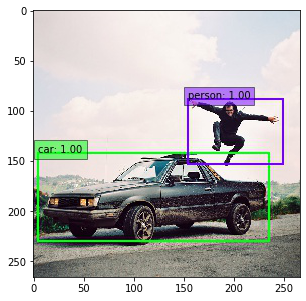

pictures_cars+people_12.jpg


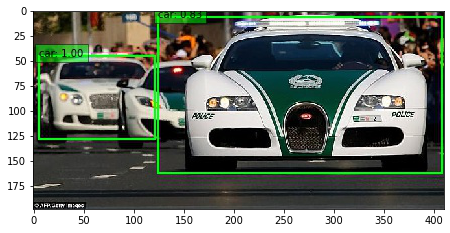

pictures_cars+people_14.jpg


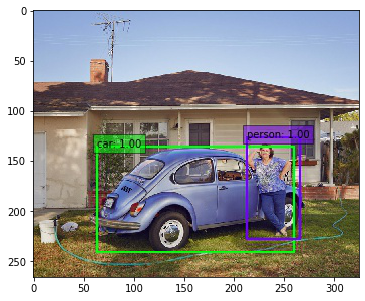

pictures_cars+people_2.jpg


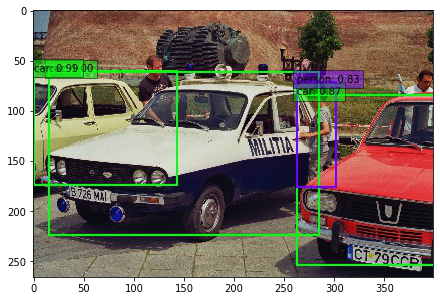

pictures_cars+people_15.jpg


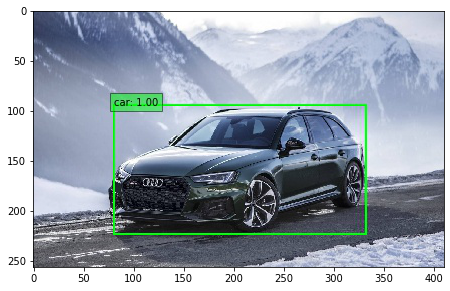

pictures_cars+people_4.jpg


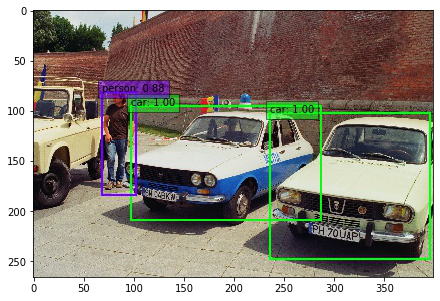

pictures_cars+people_18.jpg


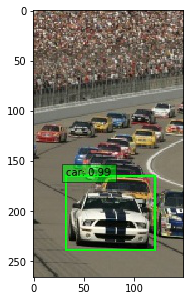

pictures_cars+people_19.jpg


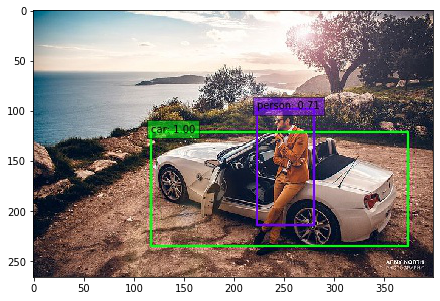

pictures_cars+people_10.jpg


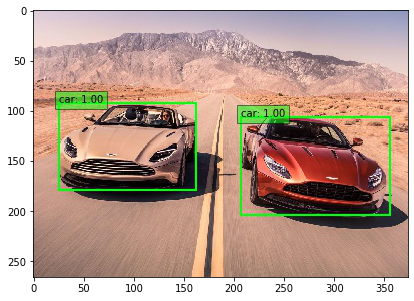

pictures_cars+people_17.jpg


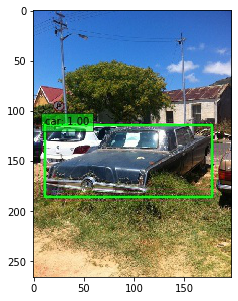

pictures_cars+people_6.jpg


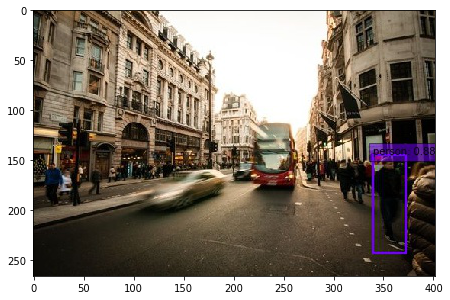

pictures_cars+people_7.jpg


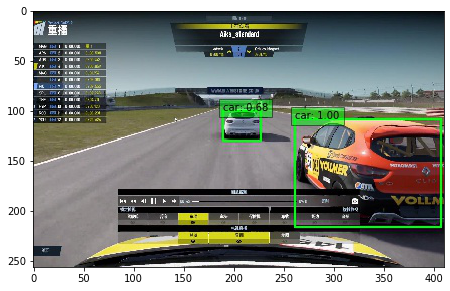

In [41]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from autokeras_pretrained.object_detector import ObjectDetector
import os

results_folder = 'results/'

detector = ObjectDetector()

directory = os.fsencode('scraped')
for file in os.listdir(directory):
    filename = os.fsdecode(file)
    if not filename.endswith('.jpg'):
        continue
    print(filename)
    try:
        results = detector.predict('scraped/' + filename, 
                                   output_file_path=results_folder)
    except Exception:
        print('skipping', filename)
        continue
    filename_parts = filename.split('.')
    to_read = results_folder + filename_parts[0] + '_prediction.' + filename_parts[1]
    img = mpimg.imread(to_read)
    plot = plt.imshow(img)
    plt.show()

### 6.4. Deploying a model

In [2]:
# for something more advanced see tensorflow serving

from keras.datasets import mnist
from autokeras import ImageClassifier

(x_train, y_train), (x_test, y_test) = mnist.load_data()
clf = ImageClassifier(verbose=True)
clf.fit(x_train, y_train, time_limit=5 * 60)

clf.export_autokeras_model('image classifier.h5')

Saving Directory: /tmp/autokeras_XY51ND
Preprocessing the images.
Preprocessing finished.

Initializing search.
Initialization finished.


+----------------------------------------------+
|               Training model 0               |
+----------------------------------------------+
                                                                                                    
No loss decrease after 5 epochs.


Saving model.
+--------------------------------------------------------------------------+
|        Model ID        |          Loss          |      Metric Value      |
+--------------------------------------------------------------------------+
|           0            |   0.3034146435558796   |         0.978          |
+--------------------------------------------------------------------------+


+----------------------------------------------+
|               Training model 1               |
+----------------------------------------------+
Epoch-10, Current Metric - 0.9

In [4]:
from autokeras.utils import pickle_from_file
loaded_clf = pickle_from_file('image classifier.h5')
results = loaded_clf.evaluate(x_test, y_test)
print(results)


0.9806
